In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [18]:
y.shape

(70000,)

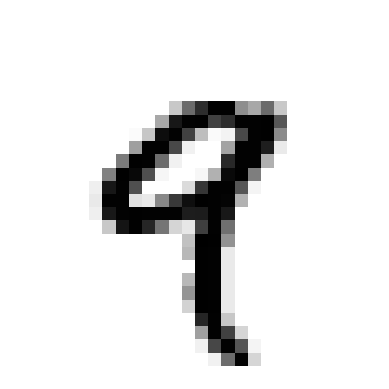

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[4]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image,cmap='binary')
plt.axis("off")
plt.show()

In [20]:
y[4]

'9'

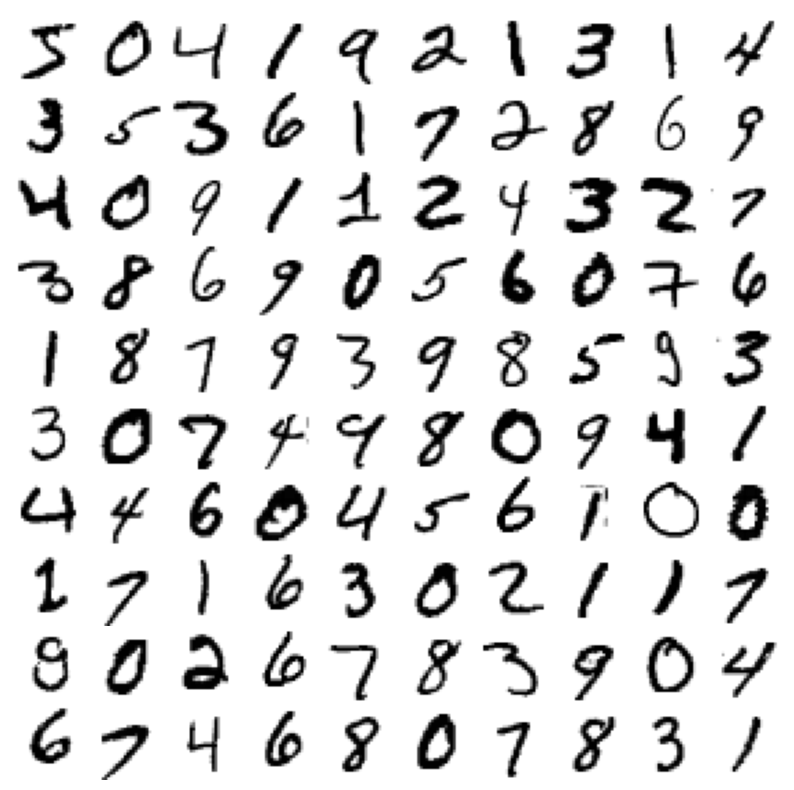

In [21]:
images = X.iloc[:100].values.reshape(-1,28,28)

fig,axes = plt.subplots(10,10,figsize=(10,10))
plt.subplots_adjust(wspace=0,hspace=0)

for i in range(10):
    for j in range(10):
        axes[i, j].imshow(images[i * 10 + j],cmap="binary")
        axes[i, j].axis('off')

plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [8]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([some_digit])

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['9'], dtype='<U1')

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, test_index in skfolds.split(X_train,y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.8618417528258424
0.8845020624631703
0.8365477338476374


In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[5161,    0,   76,   24,    7,   78,   73,    8,  118,   15],
       [   2, 5909,  113,   23,    7,   43,    7,   14,  123,   36],
       [  19,   27, 4897,  136,   62,   25,  108,   75,  241,   20],
       [   8,   15,  250, 4721,   17,  289,   21,   66,  228,   93],
       [   9,   16,   60,   13, 4661,   33,   87,   35,  175,  440],
       [  43,   12,   58,  281,   57, 4040,  137,   28,  305,   79],
       [  32,   13,   80,   12,   23,  106, 5121,    4,   87,    2],
       [  23,   12,   97,   42,   58,   21,    9, 5203,   38,  287],
       [  22,   58,  186,  192,   21,  318,   40,   27, 4500,  104],
       [  14,   17,   42,  102,  128,   63,    4,  230,  164, 4774]])

In [13]:
y_train_perfect_prediction = y_train
confusion_matrix(y_train,y_train_perfect_prediction)

array([[5560,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6277,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5610,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5708,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5529,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5040,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5480,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5790,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5468,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5538]])

In [14]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train,y_train_pred,average='weighted')

np.float64(0.8774234024855251)

In [15]:
recall_score(y_train,y_train_pred,average='weighted')


np.float64(0.8747678571428571)

In [16]:
from sklearn.metrics import f1_score

f1_score(y_train,y_train_pred,average='weighted')

np.float64(0.8755481933093283)

In [17]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-47292.26711249, -26464.0679227 , -16587.8818908 ,
        -11681.3821511 , -10833.98210021, -11453.624369  ,
        -30586.32240026,  -4846.67328101,  -3301.70089101,
          3554.25829896]])

In [18]:
threshold = 8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [19]:
y_scores = cross_val_predict(sgd_clf, X_train,y_train, cv=3,
                             method='decision_function')

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


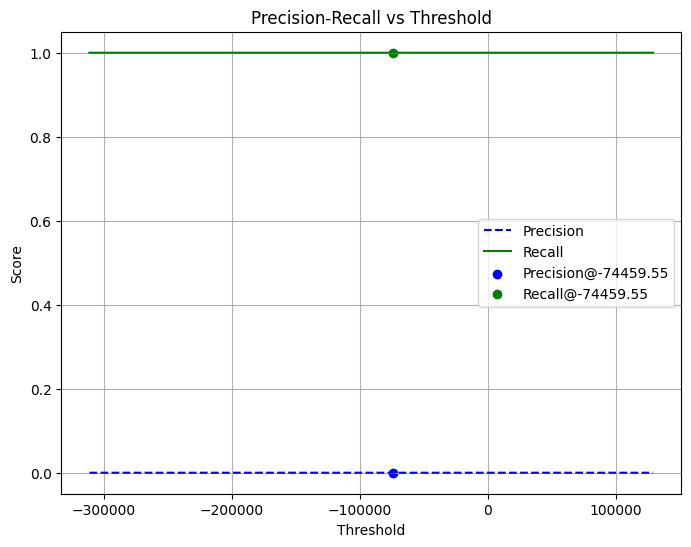

<function matplotlib.pyplot.show(close=None, block=None)>

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
n_classes = len(set(y_train))  
y_train_bin = label_binarize(y_train, classes=list(range(n_classes)))

class_index = 0
y_train_class = y_train_bin[:, class_index]

precisions, recalls, thresholds = precision_recall_curve(y_train_class, y_scores[:, class_index])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 6))
    
    # Plot precision and recall vs thresholds
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    # Highlight the threshold at a specific value
    idx = len(thresholds) // 2  # Choose an index (middle for demonstration)
    plt.scatter(thresholds[idx], precisions[idx], color="blue", label=f"Precision@{thresholds[idx]:.2f}")
    plt.scatter(thresholds[idx], recalls[idx], color="green", label=f"Recall@{thresholds[idx]:.2f}")
    
    # Add axis labels and legend
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision-Recall vs Threshold")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show

 ### Multiclass Classification (w/ SVC)

In [21]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['9'], dtype=object)

In [22]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[-0.30570052,  2.7204428 ,  2.72542137,  4.78804111,  8.30152243,
         2.77196529,  0.69787215,  7.2714322 ,  6.27713472,  9.31341349]])

In [23]:
import numpy as np
np.argmax(some_digit_scores)

np.int64(9)

In [24]:
svm_clf.classes_[9]

'9'

In [25]:
from sklearn.multiclass import OneVsOneClassifier
ovr_clf = OneVsOneClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([some_digit])

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array(['9'], dtype=object)

In [26]:
sgd_clf.decision_function([some_digit])

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-47292.26711249, -26464.0679227 , -16587.8818908 ,
        -11681.3821511 , -10833.98210021, -11453.624369  ,
        -30586.32240026,  -4846.67328101,  -3301.70089101,
          3554.25829896]])

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84212782, 0.87416296, 0.83129755])

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.91059088, 0.90625167, 0.90147862])

In [29]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5290,    0,   15,    8,    8,   38,   40,    6,  154,    1],
       [   1, 5996,   42,   15,    3,   35,    8,   10,  155,   12],
       [  26,   28, 4982,   79,   65,   26,   56,   43,  289,   16],
       [  23,   18,  117, 4951,    2,  188,   23,   38,  288,   60],
       [  11,   17,   43,    6, 4986,   12,   43,   27,  213,  171],
       [  37,   16,   26,  148,   45, 4222,   83,   21,  369,   73],
       [  29,   17,   54,    2,   41,   89, 5134,    4,  110,    0],
       [  18,   16,   64,   20,   44,   10,    5, 5282,  103,  228],
       [  20,   59,   45,   79,    3,  130,   28,    7, 5043,   54],
       [  25,   17,   24,   60,  128,   35,    1,  149,  243, 4856]])

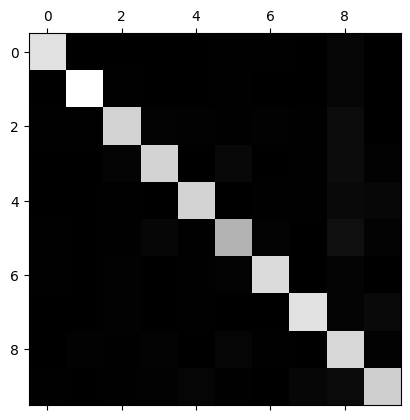

In [30]:
plt.matshow(conf_mx, cmap='gray')
plt.show()

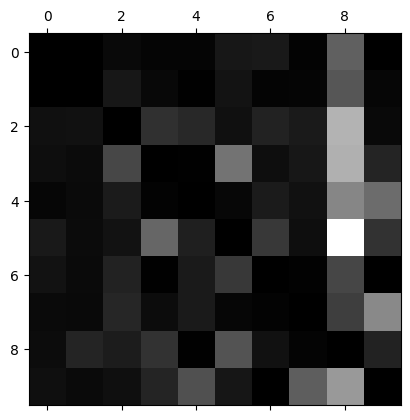

In [31]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap='gray')
plt.show()

In [32]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

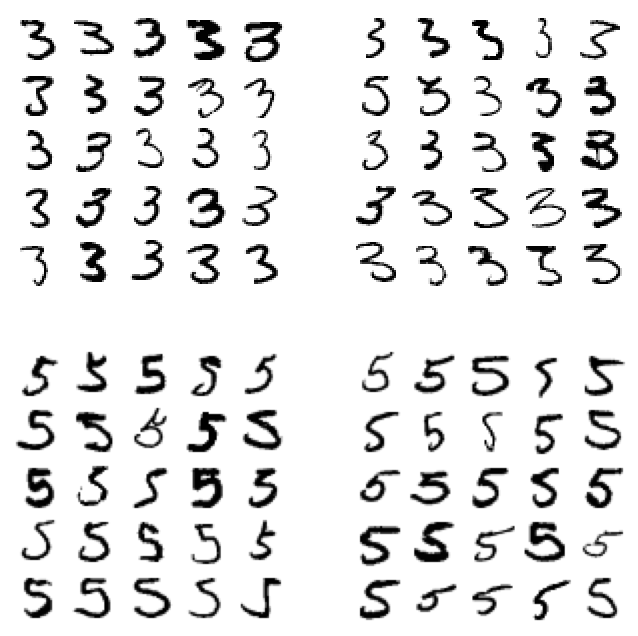

In [33]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.axis("off")
plt.show()


In [16]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_numeric = y_train.astype(int)
y_train_large = (y_train_numeric<=7)
y_train_odd = (y_train_numeric % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [47]:
knn_clf.predict([some_digit])

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [48]:
knn_clf.score(X_train,y_multilabel)

0.9851964285714285

In [49]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train,y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

np.float64(0.9861407248022942)

In [50]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise 
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

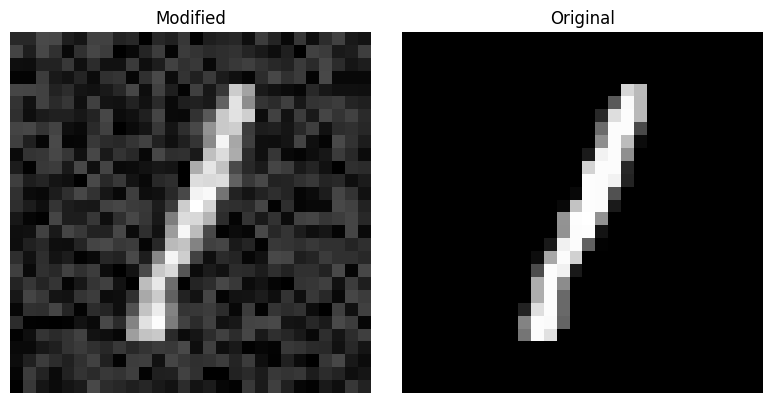

In [74]:
fig, axes = plt.subplots(1,2 ,figsize=(8,4))
axes[0].imshow(X_test_mod.iloc[56].values.reshape(28,28),cmap='gray')
axes[0].set_title("Modified")
axes[0].axis("off")

axes[1].imshow(X_test.iloc[56].values.reshape(28,28),cmap='gray')
axes[1].set_title("Original")
axes[1].axis("off")

plt.tight_layout()
plt.show()

c:\Users\User\OneDrive\Desktop\all in one\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


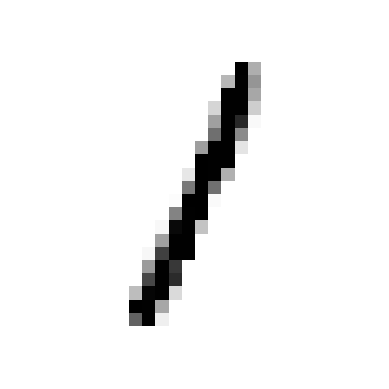

In [75]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[56]])
plot_digits(clean_digit)

In [76]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [79]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

knn_clf.fit(X_train, y_train)
print(knn_clf.score(X_test, y_test))

0.9700714285714286
